<a href="https://colab.research.google.com/github/NatarajMaddala/Tensorflow/blob/main/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
from tensorflow import keras

2.2.0-rc3


In [ ]:
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<=0.2):
      print("\nReached 80% accuracy so cancelling training")
      self.model.stop_training = True

In [ ]:
callbacks = mycallback()
mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(training_im, training_la), (test_im, test_la) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


0
[[  0   0   0   0   0   0   0   0   0  42 110   1   0   0   0   0   0 156  21   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1  32  56  40  21 195 170 173 193 183 183 243 135   3  40  44  40   1   0   0   0   0   0]
 [  0   0   0   0   0  48  50  25   7   1   1  38 173 255 220 154  23   0   0   0  13  32  52   0   0   0   0   0]
 [  0   0   0   0  25  38  25  19  13  17   0   0   0   0   0   0   0   7  11  11  13  19  34  32   0   0   0   0]
 [  0   0   0   5  65  25  46  27   9  11  13   3   0   0   0   5   3   0   0   5  15  27  27  50  23   0   0   0]
 [  0   0   0  28  46  42  32  46   1   0   0   0   0   0   3   0   1  27   9   1  13  28  46  42  38   0   0   0]
 [  0   0   0  59  25  50  54   9  94 160  98  75  81 108 131  92  61  79 129 148  63  46  61  27  50   0   0   0]
 [  0   0   0  15  40  46  75  44  32  32   1 127 133  25 173  46 137 110   5   7  50  65  56  40  30   0   0   0]
 [  0   0   0   0  13  52  81  59  36   0   0  32 106   7  86  23  13  11   0 

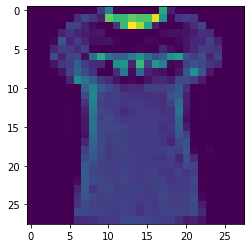

In [ ]:

np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_im[34])
print(training_la[34])
print(training_im[34])

In [ ]:
training_im = training_im/255.0
test_im = test_im/255.0

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_im, training_la, epochs=5, callback)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5033 - accuracy: 0.8221
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3749 - accuracy: 0.8643
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3369 - accuracy: 0.8769
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3137 - accuracy: 0.8860
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2966 - accuracy: 0.8909


In [ ]:
model.evaluate(test_im, test_la)

313/313 [==============================] - 0s 1ms/step - loss: 0.3694 - accuracy: 0.8682


[0.369362473487854, 0.8682000041007996]

In [ ]:
classifications = model.predict(test_im)
print(classifications[0])
print(test_la[0])

[3.8471157e-06 1.6055237e-06 4.1662982e-08 3.9444366e-08 4.6782237e-08 3.3045160e-03 1.3500733e-06 4.7403753e-02 5.2682472e-06 9.4927949e-01]
9


In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(tr_im, tr_la), (te_im, te_la) = mnist.load_data()
tr_im = tr_im.reshape(60000, 28, 28, 1)
tr_im = tr_im / 255.0
te_im = te_im.reshape(10000, 28, 28, 1)
te_im = te_im/255.0
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(tr_im, tr_la, epochs=5)
model.evaluate(te_im, te_la)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

[0.2489910125732422, 0.909500002861023]